Prepared By: Chua Tze Ren

# Table of Contents {-} 

1. Introduction and motivation
2. Dataset Source
3. Importing Python libraries
4. Reading and understanding our data
5. Data Cleaning

    5.1 Fields of the dataset

    5.2 Changing datatype of categorical variables and continuous variables
    
    5.3 Data transformation of Pokemon Name
6. Exploring our data

    6.1 Pokemon Types 
    
    6.2 Legendary Pokemon 
    
    6.3 Generation 
7. Correlation between different stats
8. Pokemon stats analysis  

    8.1 Stats across types 
    
    8.2 Comparison of stats between types
    
    8.3 HP
    
    8.4 Attack 
    
    8.5 Defense
    
    8.6 Special Attack
    
    8.7 Special Defense
    
    8.8 Speed
9. Conclusion 

# Part 1: Introduction and Motivation {-} 

# Introduction {-}

Pokemon is a Japanese media franchise managed by The Pokemon Company. Founded in 1995, Pokemon has an estimated net worth of USD 95 billion (as of July 2021). Products of The Pokemon Company come in many forms such as video games, card games, movies and television shows. Short for "Pocket Monsters", Pokemon are creatures who live in the wild or alongside humans in an alternate universe which is the Pokemon World. Pokemon have the ability to battle other Pokemon and will earn experience points if they win their Pokemon battle, which will enable them to become stronger.

Every Pokemon has a name and have a property known as a Type, with each Pokemon having either one or two types. In addition, all Pokemon have a bunch of values known as Statistics (or Stats for short) which will determine their performance in Pokemon battles. 

# Motivation {-} 

Growing up, Pokemon has been a major part of my childhood. I not only fervently remember playing the Pokemon video games on my Gameboy or Nintendo DS, but also watching the latest Pokemon TV episode on Saturday mornings. As someone who loves both Pokemon and data, this dataset is perfect for me to conduct Exploratory Data Analysis on! 

# Part 2: Dataset Source {-} 

The dataset used for this EDA was obtained from Kaggle, which is a crowd-sourced platform to attract, nurture, train and challenge data enthusiasts from all around the world to solve data science, machine learning and predictive analytics problems. Kaggle contains thousands of public datasets which are available for public use. It is an excellent platform for budding data analysts to obtain relevant datasets to play around with! 

The dataset used for this EDA can be found at this link: https://www.kaggle.com/abcsds/pokemon 

# Part 3: Importing Python libraries {-}

We will first begin by importing the necessary Python libraries needed to conduct our EDA. 

In [1]:
#import necessary libraries first 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Part 4: Reading and understanding our data {-}

Next, we will obtain our raw data by using the in-built read_csv function in pandas. 

In [3]:
pokemon = pd.read_csv('Pokemon.csv')

In [4]:
pokemon.shape

(800, 13)

Our dataset has 800 rows and 13 columns. This means that there are 800 entries and 13 unique fields. 

In [5]:
{
    "tags": [
        "hide-input",
    ]
}

pokemon.info

<bound method DataFrame.info of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp

For context, these are the following fields in the dataset. 

1. '#' - this refers to the ID number of the Pokemon in the Pokedex
2. Name - this refers to the name of the Pokemon 
3. Type 1 - this is the primary type of the Pokemon. This entry cannot be empty as all Pokemon must have at least one type. 
4. Type 2 - this is the secondary type of the Pokemon. This entry may be empty as not every Pokemon has a second type. 
5. Total - this is the sum of all the 6 individual stats of a Pokemon.
6. HP - also known as Hit Points, this stat determines the maximum health points that a Pokemon can have. 
7. Attack - determines how powerful a Pokemon's physical attacks are.
8. Defense - determines how well a Pokemon can resist its opponent's physical attacks.
9. Sp. Atk - determines how powerful a Pokemon's special attacks are. 
10. Sp. Def - determines how well a Pokemon can resist its opponent's special attacks.
11. Speed - determines which Pokemon goes first in a battle. A Pokemon with a higher speed stat in a battle will make its move first. 
12. Generation - this is the generation in which the Pokemon was first released. The smaller the number, the older the Pokemon. 
13. Legendary - this refers to whether a Pokemon is a legendary Pokemon or not. Legendary Pokemon are generally much more powerful than ordinary Pokemon.


Next, we will check our dataset for any missing values. 

In [6]:
pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

From our code above, it appears that our dataset is largely complete, with null values only appearing in the Type 2 field. This is to be expected, as some Pokemon do not have a second type. 

Next, let us obtain the overall statistics of the different metrics in our dataset. 

In [7]:
pokemon.describe().round(1)

#  Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
count  800.0  800.0  800.0   800.0    800.0    800.0    800.0  800.0   
mean   362.8  435.1   69.3    79.0     73.8     72.8     71.9   68.3   
std    208.3  120.0   25.5    32.5     31.2     32.7     27.8   29.1   
min      1.0  180.0    1.0     5.0      5.0     10.0     20.0    5.0   
25%    184.8  330.0   50.0    55.0     50.0     49.8     50.0   45.0   
50%    364.5  450.0   65.0    75.0     70.0     65.0     70.0   65.0   
75%    539.2  515.0   80.0   100.0     90.0     95.0     90.0   90.0   
max    721.0  780.0  255.0   190.0    230.0    194.0    230.0  180.0   

       Generation  
count       800.0  
mean          3.3  
std           1.7  
min           1.0  
25%           2.0  
50%           3.0  
75%           5.0  
max           6.0

# Part 5: Data Cleaning {-}

Even though our data is largely clean, it is not perfect. There are still certain parts of our dataset which are vague or unclear, so we still need to do a bit of data cleaning.

## 5.1: Fields of the dataset 

Firstly, we shall make the following changes to our dataset columns. 

1. The column name '#' is vague. For clarity purposes, we shall rename this column to 'Pokedex #' instead. 
2. For entries which have a null value for their Type 2 column, we will replace the null value with 'None' instead. 
3. We will create a new field called 'Dual Type', which is a boolean value on whether a Pokemon has two types or not. 

In [8]:
pokemon = pokemon.rename(columns = {'#':'Pokedex #'})
pokemon['Type 2'] = pokemon['Type 2'].fillna(value = 'None')
pokemon['Dual Type'] = np.where(pokemon['Type 2'].isna(), False, True)

In [9]:
pokemon

Pokedex #                   Name   Type 1  Type 2  Total  HP  Attack  \
0            1              Bulbasaur    Grass  Poison    318  45      49   
1            2                Ivysaur    Grass  Poison    405  60      62   
2            3               Venusaur    Grass  Poison    525  80      82   
3            3  VenusaurMega Venusaur    Grass  Poison    625  80     100   
4            4             Charmander     Fire    None    309  39      52   
..         ...                    ...      ...     ...    ...  ..     ...   
795        719                Diancie     Rock   Fairy    600  50     100   
796        719    DiancieMega Diancie     Rock   Fairy    700  50     160   
797        720    HoopaHoopa Confined  Psychic   Ghost    600  80     110   
798        720     HoopaHoopa Unbound  Psychic    Dark    680  80     160   
799        721              Volcanion     Fire   Water    600  80     110   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Dual Type  
0         49       65       65     45           1      False       True  
1         63       80       80     60           1      False       True  
2         83      100      100     80           1      False       True  
3        123      122      120     80           1      False       True  
4         43       60       50     65           1      False       True  
..       ...      ...      ...    ...         ...        ...        ...  
795      150      100      150     50           6       True       True  
796      110      160      110    110           6       True       True  
797       60      150      130     70           6       True       True  
798       60      170      130     80           6       True       True  
799      120      130       90     70           6       True       True  

[800 rows x 14 columns]

## 5.2: Changing datatype of categorical variables and continuous variables {-}

In [10]:
pokemon.columns
pokemon.columns[1:]

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Dual Type'],
      dtype='object')

From our code above, it appears that all our fields are of the datatype 'object'. However, most of our fields are either categorical variables or discrete variables. Hence, we will need to change the datatype of these fields to either 'category' or 'int'. 

In [11]:
categorical = ['Pokedex #','Type 1', 'Type 2', 'Generation', 'Legendary', 'Dual Type']
continuous = []
for field in pokemon.columns[2:]:
    if field not in categorical:
        continuous.append(field)
for i in categorical: 
    pokemon[i] = pokemon[i].astype('category')
for j in continuous:
    pokemon[j] = pokemon[j].astype('int')

## 5.3: Data transformation of Pokemon Name {-}  

Some of the entries in the Name field are in a very unpresentable manner. To be precise, these entries are unpresentable because their names are clumped together rather than being spaced out. Hence, we need to transform some of the data to make it more readable. These are the following types of Pokemon with issues in the Name field. 

1. Mega Evolution Pokemon 
2. Primal Groudon and Primal Kyogre
3. Deoxys, which has 4 different formes: Normal, Attack, Defense and Speed  
4. Tornadus, Thundurus and Landorus, which can all appear in two formes: Incarnate and Therian 
5. Wormadam, which has 3 different formes: Plant Cloak, Sandy Cloak and Trash Cloak 
6. Rotom, which has 5 different formes: Heat, Wash, Frost, Fan and Mpw 
7. Giratina, which has 2 formes: Altered and Origin
8. Shaymin, which has 2 formes: Land and Sky
9. Darmanitan, which has 2 formes: Standard and Zen
10. Kyurem, which has 2 formes: Black and White
11. Meloetta, which has 2 formes: Aria and Pirouette
12. Meowstic, which has 2 formes: Male and Female (unlike most Pokemon which have the same appearance regardless of their gender, the physical form of Meowstic depends on its gender) 
13. Aegislash, which has 2 formes: Blade and Shield 
14. Pumpkaboo and Gourgiest, which each come in 4 different sizes: Small, Average, Large and Super
15. Zygarde (50% forme), whose entry is currently "Zygarde50% Forme"
16. Hoopa, which has 2 formes: Confined and Unbound 

In [12]:
#Data transformation for Mega Evolutions as well as Tornadus and Thundurus

def mega_pokemon(string):
    return 'Mega' in string

def primal_pokemon(string):
    return 'Primal' in string

def incarnate_forme(string):
    return 'Incarnate' in string 

def therian_forme(string):
    return 'Therian' in string

pokemon['Name'] = pokemon['Name'].apply(lambda x: 'Mega ' + x.split("Mega")[0] if mega_pokemon(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: 'Primal ' + x.split("Primal")[0] if primal_pokemon(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split("Incarnate Forme")[0] + " (Incarnate Forme)" if incarnate_forme(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split("Therian Forme")[0] + " (Therian Forme)" if therian_forme(x) else x)

After applying the data transformation of the mega evolutions, both Charizard and Mewtwo, whose mega evolutions each have 2 different formes (X and Y), both have the name 'Charizard' and 'Mewtwo' respectively. Hence, we need to apply an additional data transformation step to distinguish between the two formes. 

In [13]:
##For Charizard and Mewtwo 

for i in [7,163]:
    pokemon['Name'][i] += ' X'
    
for j in [8,164]:
    pokemon['Name'][j] += ' Y'

In [14]:
#Deoxys, Wormadam and Rotom Formes

deoxys_formes = [' (Normal Forme)', ' (Attack Forme)', ' (Defense Forme)', ' (Speed Forme)']
for i in range(428,432):
    pokemon['Name'][i] = 'Deoxys' + deoxys_formes[i-428]
    
wormadam_formes = [' (Plant Cloak)', ' (Sandy Cloak)', ' (Trash Cloak)']
for i in range(458,461):
    pokemon['Name'][i] = 'Wormadam' + wormadam_formes[i - 458]

rotom_formes = ['Heat', 'Wash', 'Frost', 'Fan', 'Mow']
for i in range(532,537):
    pokemon['Name'][i] = rotom_formes[i-532] + ' Rotom'

In [15]:
#Giratina, Shaymin and Darmanitan 

pokemon['Name'][544] = "Giratina " + pokemon['Name'][544].split("Giratina")[1]
pokemon['Name'][545] = "Giratina " + pokemon['Name'][545].split("Giratina")[1]

pokemon['Name'][550] = "Shaymin " + pokemon['Name'][550].split("Shaymin")[1]
pokemon['Name'][551] = "Shaymin " + pokemon['Name'][551].split("Shaymin")[1]

pokemon['Name'][615] = "Darmanitan " + pokemon['Name'][615].split("Darmanitan")[1]
pokemon['Name'][616] = "Darmanitan " + pokemon['Name'][616].split("Darmanitan")[1]

In [16]:
#Kyurem, Keldeo and Meloetta

pokemon['Name'][711] = pokemon['Name'][711].split('Kyurem')[1] + 'Kyurem'
pokemon['Name'][712] = pokemon['Name'][712].split('Kyurem')[1] + 'Kyurem' 

formes = ['Ordinary Forme', 'Resolute Forme', 'Aria Forme', 'Pirouette Forme']
for i in range(713, 717):
    pokemon['Name'][i] = pokemon['Name'][i].split(formes[i-713])[0] + " (" + formes[i-713] + ")"


In [17]:
#Meowstic and Aegislash 

pokemon['Name'][746] = 'Meowstic (Male)'
pokemon['Name'][747] = 'Meowstic (Female)'

pokemon['Name'][750] = pokemon['Name'][750].split('Blade Forme')[0] + ' (Blade Forme)'
pokemon['Name'][751] = pokemon['Name'][751].split('Shield Forme')[0] + ' (Shield Forme)'

In [18]:
#Pumpkaboo and Gourgiest

def small_size(string):
    return 'Small Size' in string

def average_size(string):
    return 'Average Size' in string 

def large_size(string):
    return 'Large Size' in string

def super_size(string):
    return 'Super Size' in string 

pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split('Small Size')[0] + ' (Small Size)' if small_size(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split('Average Size')[0] + ' (Average Size)' if average_size(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split('Large Size')[0] + ' (Large Size)' if large_size(x) else x)
pokemon['Name'] = pokemon['Name'].apply(lambda x: x.split('Super Size')[0] + ' (Super Size)' if super_size(x) else x)


In [19]:
#Zygarde and Hoopa

pokemon['Name'][794] = 'Zygarde (50% Forme)'

for i in [797,798]:
    pokemon['Name'][i] = 'Hoopa' + pokemon['Name'][i].split('HoopaHoopa')[1]

# Part 6: Exploring our data {-}

## 6.1: Pokemon Types {-} 

In [20]:
pokemon['Type 1'].unique()

['Grass', 'Fire', 'Water', 'Bug', 'Normal', ..., 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']
Length: 18
Categories (18, object): ['Grass', 'Fire', 'Water', 'Bug', ..., 'Dragon', 'Dark', 'Steel', 'Flying']

In [21]:
pokemon['Type 2'].unique()

['Poison', 'None', 'Flying', 'Dragon', 'Ground', ..., 'Electric', 'Fire', 'Ghost', 'Bug', 'Normal']
Length: 19
Categories (19, object): ['Poison', 'None', 'Flying', 'Dragon', ..., 'Fire', 'Ghost', 'Bug', 'Normal']

From our codes above, it appears that there are 18 and 19 unique entries for the Type 1 and Type 2 columns respectively. The additional entry in the Type 2 column is 'None', which simply means that the Pokemon does not have a second type. Hence, we can conclude that there are a total of 18 different Pokemon types. 

Let us now run a code to determine the frequency of each type of Pokemon. Apart from including the primary type (Type 1), we also need to also consider the secondary type (Type 2). 

In [22]:
frequency = {} 
types = pokemon['Type 1'].unique()
columns = ['Type 1', 'Type 2']
for i in types:
    for field in columns:
        try:
            frequency[i] += pokemon[field].value_counts()[i]
        except:
            frequency[i] = pokemon[field].value_counts()[i]
frequency 

{'Grass': 95,
 'Fire': 64,
 'Water': 126,
 'Bug': 72,
 'Normal': 102,
 'Poison': 62,
 'Electric': 50,
 'Ground': 67,
 'Fairy': 40,
 'Fighting': 53,
 'Psychic': 90,
 'Rock': 58,
 'Ghost': 46,
 'Ice': 38,
 'Dragon': 50,
 'Dark': 51,
 'Steel': 49,
 'Flying': 101}

In [23]:
dict_items = frequency.items()
dict_list = list(dict_items)
dict_list 
df = pd.DataFrame(dict_list, columns = ['Type', 'Frequency'])
df = df.sort_values(by = ['Frequency'], ascending = False)
df

Type  Frequency
2      Water        126
4     Normal        102
17    Flying        101
0      Grass         95
10   Psychic         90
3        Bug         72
7     Ground         67
1       Fire         64
5     Poison         62
11      Rock         58
9   Fighting         53
15      Dark         51
6   Electric         50
14    Dragon         50
16     Steel         49
12     Ghost         46
8      Fairy         40
13       Ice         38

<AxesSubplot:xlabel='Type'>

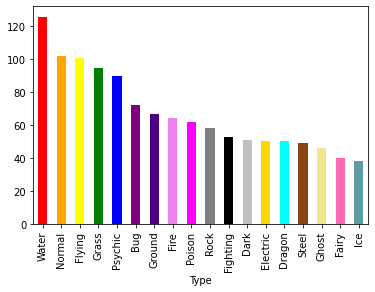

In [24]:
colors = ['red','orange','yellow','green','blue','purple','indigo','violet', 'magenta', 'grey', 'black', 'silver', 'gold', 'cyan'
         ,'saddlebrown','khaki','hotpink','cadetblue']
type_frequency = df.plot.bar(x = 'Type', y = 'Frequency', color = colors, legend = False)
type_frequency

#### Results from our analysis

1. There are a total of 18 Pokemon types
2. Among the 18 Pokemon Types, Water is the most common with 126 Pokemon. The 2nd most common type is Normal with 102 Pokemon while Flying type comes closely behind in third with 101 Pokemon. 
3. Fairy and Ice Types are the least common types with 40 and 38 types respectively. The low frequency of Fairy types should not be surprising as it was only introduced in Generation 6. 

## 6.2: Legendary Pokemon {-} 

### What is a legendary Pokemon? 

While there is no universal definition for a legendary Pokemon, legendary Pokemon do share a couple of common characteristics that may distinguish their legendary status from a non-legendary Pokemon. Below are some of these characteristics that are commonly found in legendary Pokemon.

1. Legendary Pokemon are unique, meaning that they have a population of 1 in every Pokemon video game. 
2. Legendary Pokemon are unable to breed 
3. Legendary Pokemon generally have higher total stats compared to non-legendary Pokemon 
4. Legendary Pokemon are unable to evolve (though that being said, there are many non-legendary Pokemon that do not evolve) 
5. Legendary Pokemon are commonly seen as mythical, with the legendary Pokemon usually playing an important role in the history or plot development in the main video game series which they are in. 


Let us now conduct a quick analysis on Legendary Pokemon. 

In [25]:
legendary = pokemon[pokemon['Legendary'] == True]
non_legendary = pokemon[pokemon['Legendary'] != True]
legendary_frequency = len(legendary.index)
non_legendary_frequency = len(non_legendary)
result = {'Legendary': legendary_frequency, 'Non-Legendary': non_legendary_frequency}
result

{'Legendary': 65, 'Non-Legendary': 735}

([<matplotlib.patches.Wedge at 0x1f2a759f310>,
 [Text(1.0643590041966822, 0.2777407247514256, 'Legendary'),
  Text(-1.0643590171986628, -0.27774067492518406, 'Non-Legendary')],
 [Text(0.5805594568345539, 0.15149494077350487, '8.1%'),
  Text(-0.5805594639265433, -0.15149491359555492, '91.9%')])

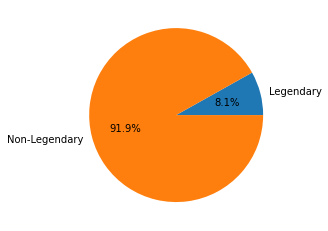

In [26]:
plt.pie([float(result[v]) for v in result], labels = [str(k) for k in result], autopct='%1.1f%%')

It appears there are only 65 Legendary Pokemon, which is less than 10% of the 735 non-Legendary Pokemon. This result is not surprising considering that Legendary Pokemon are considered "mythical". 

## 6.3: Generation {-}  

Another feature worth exploring are the different Pokemon generations. For some context these are the following generations in the Pokemon series. 

1. Generation 1 (1996-1999) - this generation is based off the Kanto region in the Pokemon world. Pokemon games released during this generation include Pokemon Red, Blue, Yellow and Green. 

2. Generation 2 (1999-2002) - this generation is a direct sequel to Generation 1 and is centred around the Johto region. Video games during this era include Pokemon Gold, Silver and Crystal. 

3. Generation 3 (2002-2006) - also commonly known as the "advanced generation", this is the generation where the GameBoy Advance was released. Unlike its predecessors which used the GameBoy and GameBoy Color to run their games, Generation 3 games made use of the GameBoy Advance instead. The Hoenn region was introduced in this generation, with the plot of Pokemon Ruby, Sapphire and Emerald taking place in this region. In addition, Pokemon Firered and Leafgreen - which are remakes of the Generation 1 games - were also released. 

4. Generation 4 (2006-2010) - this generation is based off the Sinnoh region. In addition, a new gaming console - the Nintendo DS - was also introduced in this generation. There are a total of 3 video games in Generation 4 - Pokemon Diamond, Pokemon Pearl and Pokemon Platinum. 

5. Generation 5 (2010-2013) - this generation is centred around the Unova region. There are a total of 4 games released in Generation 5. The first two are Pokemon Black and Pokemon White, which were released in 2010. Direct sequels to these games, Pokemon Black 2 and Pokemon White 2, were released 2 years later in 2012. 

6. Generation 6 (2013-2016) - this is the generation where Pokemon games made the transition from 2D to 3D, with all the games only being compatible on the newly released Nintendo 3DS console. This generation marked the beginning of the Kalos region era, with Pokemon X and Pokemon Y revolving around this new region. In addition, remakes of Pokemon Ruby and Sapphire - Omega Ruby and Alpha Sapphire - were also released in this generation. 

While this dataset covers a total of 6 generations, it is worthy to note that as of July 2021, there are a total of 8 generations in the Pokemon franchise. 

We shall now run a simple code to count the number of new Pokemon available in each generation. 

In [27]:
grouped = pokemon[['Generation']].groupby('Generation').size().reset_index(name = "Frequency")
grouped = grouped.sort_values(by = ['Frequency'], ascending = False)
grouped

Generation  Frequency
0          1        166
4          5        165
2          3        160
3          4        121
1          2        106
5          6         82

#### Results from the Pokemon Generation analysis 

1. Generation 1 has the most number of Pokemon, at 166 while Generation 5 comes close after at 165. Generation 1 having the most Pokemon is unsurprising as it is the generation that marked the debut of the traditional Pokemon franchise. 
2. Generation 6 has the fewest number of Pokemon at 82. 

# Part 7: Correlation between different stats {-} 

By observation, it is not uncommon for Pokemon to have two stats that are particularly higher than the rest. For instance, Salamence and Infernape both have very high Attack and Special Attack stats while Shuckle has very high Defense and Special Defense stats. However, there is no conclusive evidence that stats are correlated with one another. Hence, we shall plot a correlation matrix to find out the correlation between different stats. 

Upon obtaining the correlation coefficient, we will use the following metrics to quantify our results. 

0 - No linear relationship 
0 to 0.50 - Weak linear relationship 
0.50 to 0.70 - Moderate linear relationship 
0.70 to 1.00 - Strong lienar relationship 
1.00 - Perfect linear relationship 



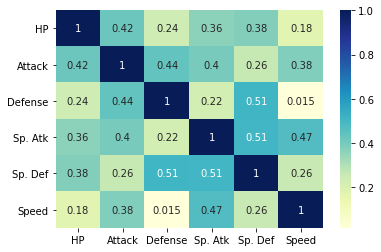

In [28]:
pokemon_temp = pokemon.drop(['Total',], axis = 1)
corr = pokemon_temp.corr()
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=True)

From the correlation matrix above, most variables have a weak linear relationship with one another as they have a correlation coefficient with a magnitude lesser than 0.5. However, there are two relationships that do stand out more strongly than the rest. 

1. Special Attack and Special Defense stats, which have a moderate linear relationship as they have a correlation coefficient of 0.51. 
2. Defense and Special Defense stats, which also have a moderate linear relationship with a correlation coefficient of 0.51. 

The observations above are not surprising. Observation 1 suggests significant presence of Pokemon with high Defense and Special Defense stats. There are several instances of these Pokemon such as Bastiodon (Defense stat of 168 and Sp. Def stat of 138), Aegislash (which has a Defense and Sp. Def stat of 150 each) and Shuckle (with a Defense and Sp. Def stat of 230 each!) 

Meanwhile, Observation 2 suggests substantial presence of Pokemon with high Special stats. Instances of such Pokemon include Gardevoir (Sp. Atk stat of 125 and Sp. Def stat of 115), Goodra (Sp. Atk stat of 110 and Sp. Def stat of 150) and Ho-Oh (Sp. Atk stat of 110 and Sp. Def stat of 154). 

# Part 8: Pokemon stats analysis {-} 

We will now conduct data analysis on Pokemon stats. This will be done through two ways - 1. by comparing stats across each Pokemon type and 2. by looking at individual stats across all types of Pokemon 

## 8.1: Stats across types {-} 

We will first look at the stats across all Pokemon types. However, we need to first prepare the relevant datasets needed to conduct our analysis. There are a total of 18 datasets to prepare, one for each Pokemon type. When preparing the datasets, it is also important to consider both Type 1 and Type 2 when choosing the relevant entries to be considered (for instance, a dataset containing all the Grass types must not only have Pokemon which have Grass type as their primary type, but also dual type Pokemon which have Grass as their secondary type).

In [29]:
#Preparing the 18 datasets needed for our analysis 

grass = pokemon[(pokemon['Type 1'] == 'Grass') | (pokemon['Type 2'] == 'Grass')]
fire = pokemon[(pokemon['Type 1'] == 'Fire') | (pokemon['Type 2'] == 'Fire')]
water = pokemon[(pokemon['Type 1'] == 'Water') | (pokemon['Type 2'] == 'Water')]
bug = pokemon[(pokemon['Type 1'] == 'Bug') | (pokemon['Type 2'] == 'Bug')]
normal = pokemon[(pokemon['Type 1'] == 'Normal') | (pokemon['Type 2'] == 'Normal')]
poison = pokemon[(pokemon['Type 1'] == 'Poison') | (pokemon['Type 2'] == 'Poison')]
electric = pokemon[(pokemon['Type 1'] == 'Electric') | (pokemon['Type 2'] == 'Electric')]
ground = pokemon[(pokemon['Type 1'] == 'Ground') | (pokemon['Type 2'] == 'Ground')]
fairy = pokemon[(pokemon['Type 1'] == 'Fairy') | (pokemon['Type 2'] == 'Fairy')]
fighting = pokemon[(pokemon['Type 1'] == 'Fighting') | (pokemon['Type 2'] == 'Fighting')]
psychic = pokemon[(pokemon['Type 1'] == 'Psychic') | (pokemon['Type 2'] == 'Psychic')]
rock = pokemon[(pokemon['Type 1'] == 'Rock') | (pokemon['Type 2'] == 'Rock')]
ghost = pokemon[(pokemon['Type 1'] == 'Ghost') | (pokemon['Type 2'] == 'Ghost')]
ice = pokemon[(pokemon['Type 1'] == 'Ice') | (pokemon['Type 2'] == 'Ice')]
dragon = pokemon[(pokemon['Type 1'] == 'Dragon') | (pokemon['Type 2'] == 'Dragon')]
dark = pokemon[(pokemon['Type 1'] == 'Dark') | (pokemon['Type 2'] == 'Dark')]
steel = pokemon[(pokemon['Type 1'] == 'Steel') | (pokemon['Type 2'] == 'Steel')]
flying = pokemon[(pokemon['Type 1'] == 'Flying') | (pokemon['Type 2'] == 'Flying')]

types = ['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']
dataframes = [grass, fire, water, bug, normal, poison, electric, ground, fairy, fighting, psychic, rock, ghost, ice, dragon, dark, steel, flying]

Before we plot our boxplot diagrams, it is important for us to understand the features in our boxplot. Listed below are the relevant features. 

Box 

1. The lower vertical line is the **lower quartile**. This is the value at the 25th percentile. (Q1) 
2. The upper vertical line is the **upper quartile**. This is the value at the 75th percentile. (Q3)
3. The middle vertical line is the **median**. This is the value at the 50th percentile. (Q2) 
4. From Q1 and Q3, we can also obtain the **interquartile range** of our data, which is simply Q3 - Q1. 

Whisker

1. The vertical line below the lower whisker is also known as the **"minimum"**. This value is calculated using the formula Q1 - 1.5*(Q3 - Q1) 
2. The vertical line above the upper whisker is also known as the **"maximum"**. This value is calculated using the formula Q3 + 1.5*(Q3 - Q1) 

Others 

1. Outlier. These are points on the boxplot diagram which are either higher than the "maximum" or lower than the "minimum". 

In the analysis below, we will be aiming to find the strongest stat for a particular type of Pokemon. We will use the median as the main metric in determining the strongest stat. If using the median as a metric is not sufficient (i.e. two or more stats may have median values very close to one another), we will also take other metrics into consideration when deriving our conclusion. 

#### Type 1: Grass

Text(0.5, 1.0, 'Box and Plot diagram for Grass Types')

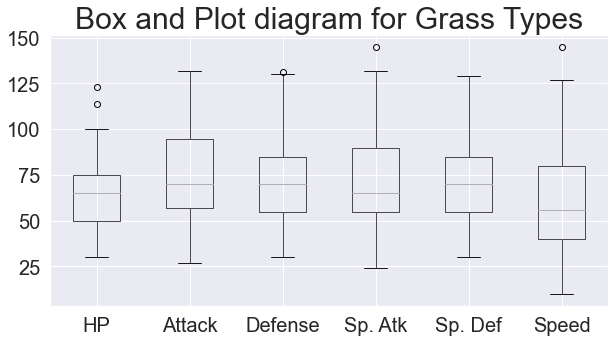

In [89]:
grass_temp = grass.drop(['Total',], axis = 1)
grass_temp.boxplot(fontsize = 20, figsize = (10,5))
plt.title('Box and Plot diagram for Grass Types', fontsize = 30)

From the box plots above, it appears that Grass types do not have a single stat which is particularly strong. Its Attack, Defense and Sp. Def stats have the highest medians with their medians all around the same value.

However, it is worthy to note that whie the Attack stat has one of the highest medians, the Attack stat also has one of the highest interquartile ranges (along with the Speed stat), which suggests a relatively high degree of dispersion. 

#### Type 2: Fire

Text(0.5, 1.0, 'Box and Plot diagram for Fire Types')

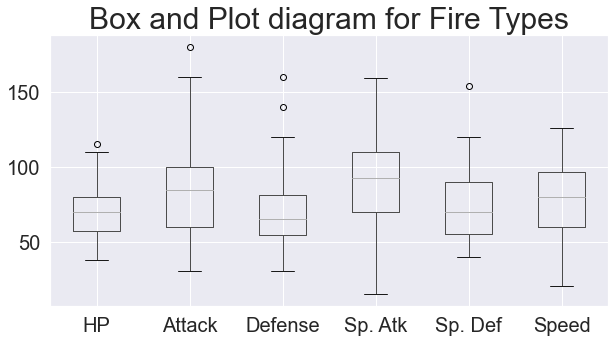

In [90]:
fire_temp = fire.drop(['Total',], axis = 1)
fire_temp.boxplot(fontsize = 20, figsize = (10,5))
plt.title('Box and Plot diagram for Fire Types', fontsize = 30)

From the box plots above, we can conclude that the strongest stat of Fire types is Sp. Atk as it has the largest median amongst all six stats. Fire types also have relatively high Attack and Speed stats, with their medians just slightly lower than that of the Sp. Atk stat's median. These suggest that in general, Fire types are better attackers than defenders.

#### Type 3: Water

Text(0.5, 1.0, 'Box and Plot diagram for Water Types')

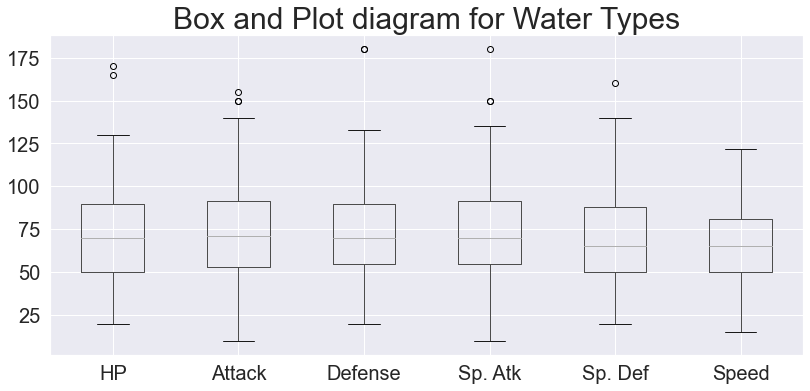

In [91]:
water_temp = water.drop(['Total',], axis = 1)
water_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Water Types', fontsize = 30)

From the box plots above, it is interesting to note that the median stats for Water type Pokemon are roughly identical. This means that we are unable to conclude that Water types has any stat which is particularly strong. In addition, the interquartile ranges of all six stats are approximately equal, apart from the Speed stat which has a slightly lower interquartile range than the rest.

With the median stats being identical and the Speed stat having the lowest interquartile range, perhaps we can conclude that the Speed stat is the Water type's strongest suit. 

#### Type 4: Bug

Text(0.5, 1.0, 'Box and Plot diagram for Bug Types')

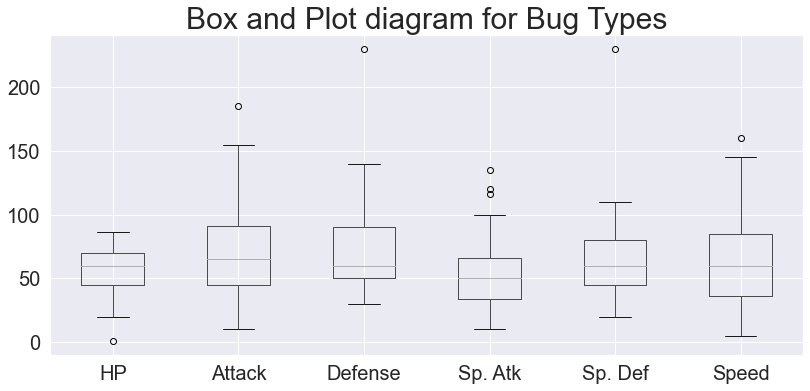

In [92]:
bug_temp = bug.drop(['Total',], axis = 1)
bug_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Bug Types', fontsize = 30)

The boxplot diagrams for Bug type Pokemon are very interesting to say the least. For a start, the median values of all the stats are roughly identical so it is difficult to pinpoint any stat which is particularly strong. 

However, we are able to conclude that the HP stat of Bug Pokemon is its weakest stat. There are a couple of reasons for this. First of all, the 75th percentile for the HP stat is much lower than all the other stats, apart from the Sp. Atk stat. In addition, the upper extreme of the HP stat is also significantly lower than all other stats. 

We can also observe that there are several outliers in the boxplot diagram of the Sp. Atk stat. This is particularly interesting to note, as the Sp. Atk is one of the weaker stats of the Bug Type - its 25th and 75th percentiles are lower than most of the other stats, while its upper extreme is lower than its other stats (apart from HP). This suggests that there are certain Bug Type Pokemon with notably high Special Attack stat. 

#### Type 5: Normal 

Text(0.5, 1.0, 'Box and Plot diagram for Normal Types')

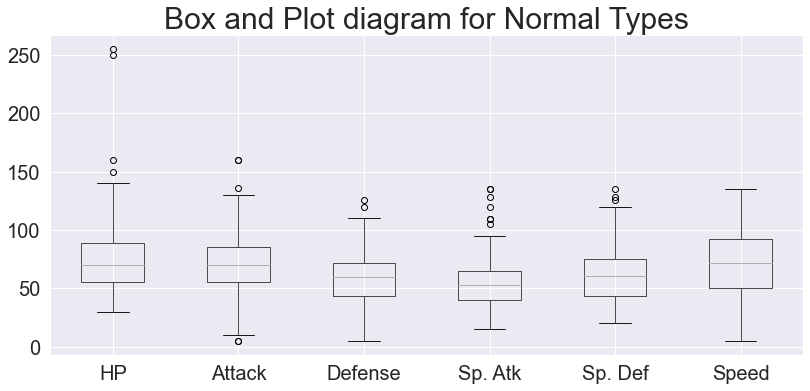

In [93]:
normal_temp = normal.drop(['Total',], axis = 1)
normal_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Normal Types', fontsize = 30)

From the boxplot diagram, it appears that the strongest stat of Normal type Pokemon is the Speed stat as its median is slightly higher. The HP and Attack stats have a median that is slightly lower than the Speed stat. 

It is also worthy to note that there are numerous outliers in the Sp. Atk boxplot diagram, which represent Normal type Pokemon with a Sp. Atk stat of more than 100. These include Pokemon like Mega Pidgeot and Porygon-Z, which have a Sp. Atk stat of 135.

#### Type 6: Poison

Text(0.5, 1.0, 'Box and Plot diagram for Poison Types')

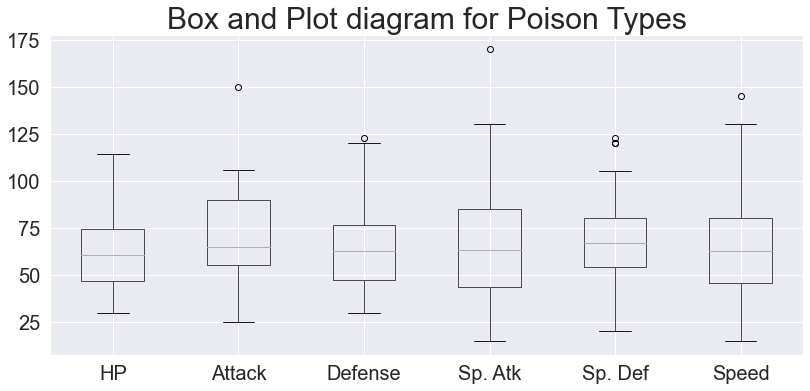

In [94]:
poison_temp = poison.drop(['Total',], axis = 1)
poison_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Poison Types', fontsize = 30)

From the boxplot above, we can conclude that the strongest stat for Poison Type Pokemon is Sp. Def. Not only is its median the highest, it also has the highest lower quartile while its upper quartile is comparable to stats with the highest upper quartiles such as Attack and Sp. Atk. It is also worthy to note that the Sp. Def stat also has the smallest interquartile range. 

#### Type 7: Electric 

Text(0.5, 1.0, 'Box and Plot diagram for Electric Types')

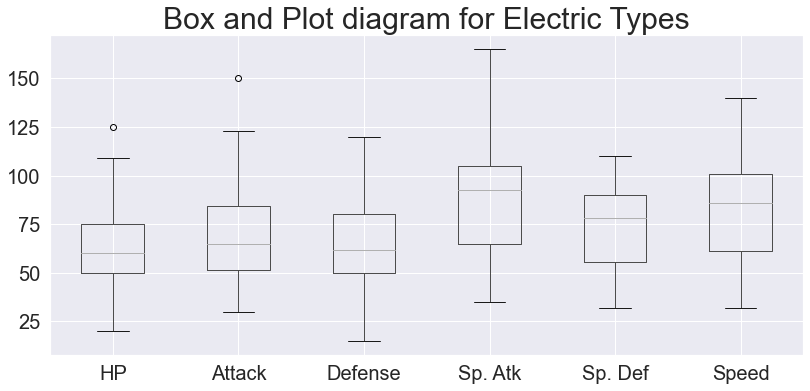

In [95]:
electric_temp = electric.drop(['Total',], axis = 1)
electric_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Electric Types', fontsize = 30)

It is clear that the strongest stat for Electric Pokemon is the Sp. Atk stat. Not only is its lower extreme and upper extremes higher than all other stats, its upper quartile, lower quartile and median values are also much higher than the other stats.  

#### Type 8: Ground

Text(0.5, 1.0, 'Box and Plot diagram for Ground Types')

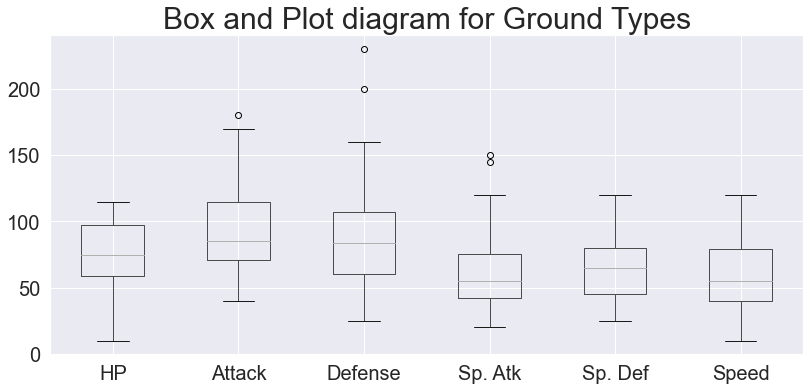

In [96]:
ground_temp = ground.drop(['Total',], axis = 1)
ground_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Ground Types', fontsize = 30)

From the boxplot, it is difficult to pinpoint the strongest stat for Ground type Pokemon. While the Attack and Defense stats have the highest medians, the Attack stat outperforms the Defense stats in all other metrics. Not only does the Attack stat have a higher lower quartile and upper quartile, it also has a higher "maximum" and "minimum" value than the Defense stat. 

#### Type 9: Fairy

Text(0.5, 1.0, 'Box and Plot diagram for Fairy Types')

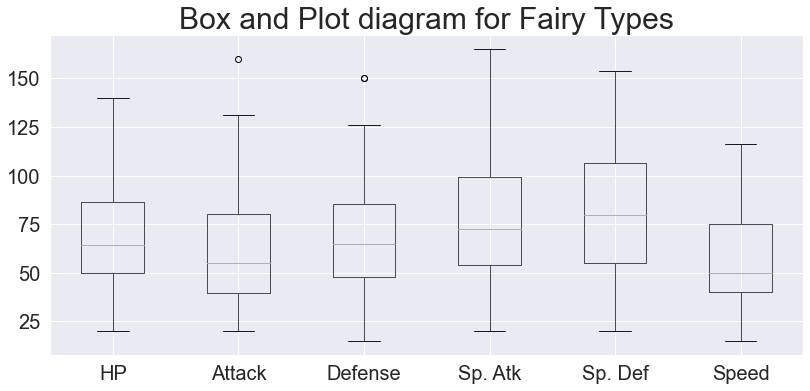

In [97]:
fairy_temp = fairy.drop(['Total',], axis = 1)
fairy_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Fairy Types', fontsize = 30)

From the boxplot above, we can conclude that the strongest stat of Fairy Types is Sp. Def as its median is the highest. However, it is also worthy to note that the Sp. Atk stat comes as a close second as its median is just slightly lower than that of the Sp. Def stat. Its other metrics, such as the "minimum" and lower quartile, are also comparable to the Sp. Def stat. 

It is clear from that the boxplot that Fairy Types are better suited to be Special attackers and defenders. Hence, it generally will not be a wise move for Pokemon Trainers to teach their Fairy Pokemon physical moves when their strength clearly lies in their special stats. 

#### Type 10: Fighting

Text(0.5, 1.0, 'Box and Plot diagram for Fighting Types')

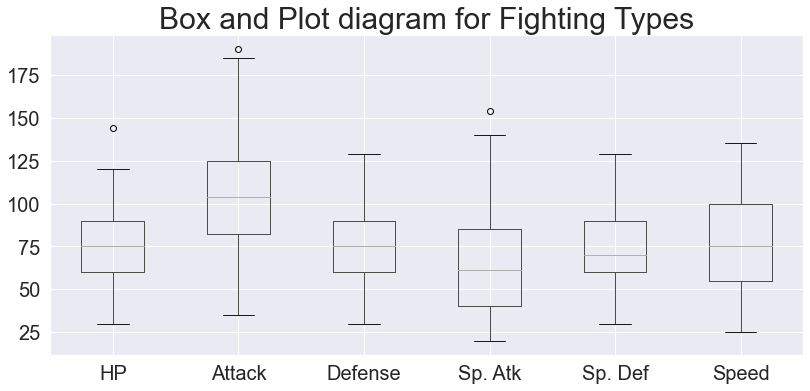

In [98]:
fighting_temp = fighting.drop(['Total',], axis = 1)
fighting_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Fighting Types', fontsize = 30)

It is clear that the strongest stat for Fighting Types is Attack as its median value is significantly higher than all its other stats. It also outperforms the remaining stats in all other metrics as well. 

#### Type 11: Psychic

Text(0.5, 1.0, 'Box and Plot diagram for Psychic Types')

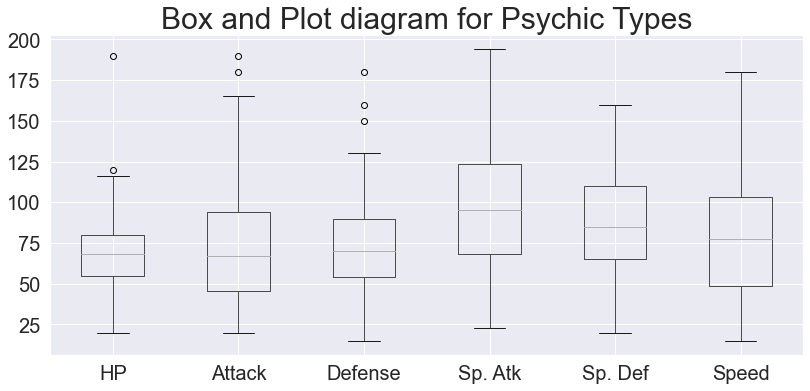

In [99]:
psychic_temp = psychic.drop(['Total',], axis = 1)
psychic_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Psychic Types', fontsize = 30)

From the boxplot diagram, we can conclude that the strongest stat for Psychic Types is its Sp. Atk. Not only is its median the highest, it also outperforms the remaining stats in all other metrics as well. 

However, it is worthy to note that Psychic types also have a relatively strong Sp. Def stat - while its median is lower than that of Sp. Atk, it still has the second highest median amongst all the stats. It is also comparable to the Sp. Atk in several other metrics as well, such as the "minimum" and lower quartile. 

Just like their Fairy Type counterparts, it is clear that Psychic Types are better suited to be Special attackers and defenders. 

#### Type 12: Rock

Text(0.5, 1.0, 'Box and Plot diagram for Rock Types')

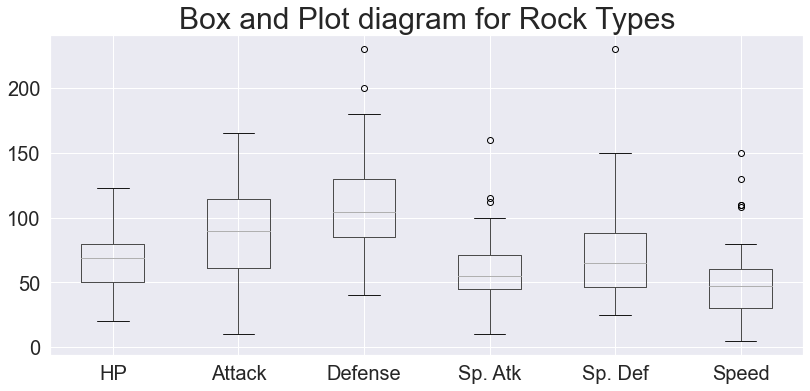

In [100]:
rock_temp = rock.drop(['Total',], axis = 1)
rock_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Rock Types', fontsize = 30)

From the boxplot, we can deduce that the strongest stat for Rock Types is Defense as its median is the highest. The Attack stat comes in at a close second as apart from the Defense stat, the median of the Attack stat is much higher than all other stats. We can therefore conclude that unlike Fairy and Psychic Pokemon, whose strengths lie in their special stats, the strength of Rock Pokemon lies more in their physical stats. 

It is also worthy to note that the boxplot of the Speed stat has numerous outliers. This means that even though the Speed stat is the worst performing stat, with a lower quartile, median and upper quartile values significantly lower than other stats, there are some exceptions of Rock Type Pokemon with very high speed stats. Examples of these would include Mega Aerodactyl and Archeops, which have a Speed stat of 150 and 110 respectively. 

#### Type 13: Ghost

Text(0.5, 1.0, 'Box and Plot diagram for Ghost Types')

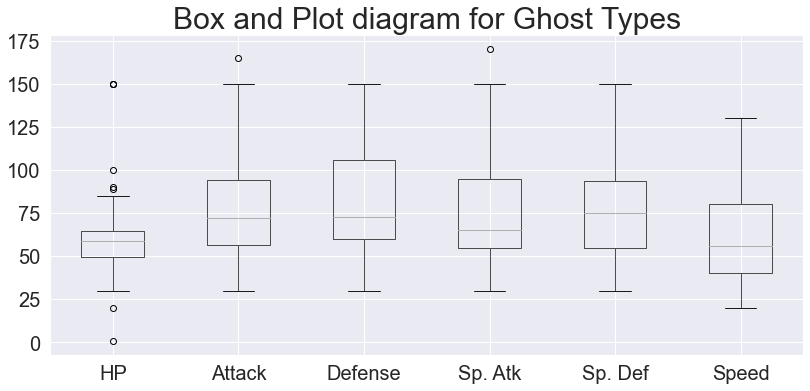

In [101]:
ghost_temp = ghost.drop(['Total',], axis = 1)
ghost_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Ghost Types', fontsize = 30)

From the boxplot, we can conclude that Sp. Def is the strongest stat amongst Ghost Pokemon as its median is significantly higher than all other stats. 

It is also worthy to note that the HP stat, which has the lowest median amongst all the stats (apart from the Speed median, whose median is comparable to that of HP), has numerous outliers which are not only located above the "maximum", but also below the "minimum". That being said, the presence of these outliers still does not mean that the HP stat of these Pokemon are comparable to some of the other stats as the "maximum" of the HP stat is significantly lower than the remaining 5 stats. 

#### Type 14: Ice

Text(0.5, 1.0, 'Box and Plot diagram for Ice Types')

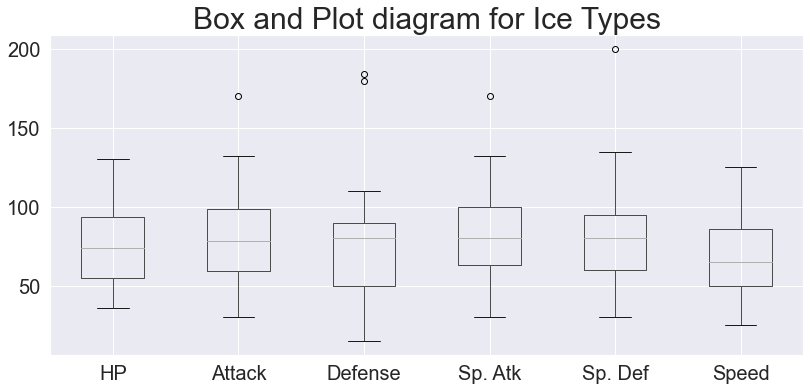

In [102]:
ice_temp = ice.drop(['Total',], axis = 1)
ice_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Ice Types', fontsize = 30)

From the boxplot, it is difficult to make a conclusion on the strongest stat for Ice Types just by looking at the median alone. The Defense, Sp. Atk and Sp. Def have medians which are roughly equal. 

However on closer inspection, the Sp. Atk and Sp. Def stats outperform the Defense stat in terms of their upper quartile and lower quartile values. Furthermore, the Sp. Atk and Sp. Def stats also have a much higher "maximum" and "minimum" compared to the Defense stat. 

That being said, it cannot be denied that the Defense stat of Ice Types is also generally strong. This means that Ice Types are not only generally capable defenders, but their strengths also lie in terms of their Special stats. 

#### Type 15: Dragon

Text(0.5, 1.0, 'Box and Plot diagram for Dragon Types')

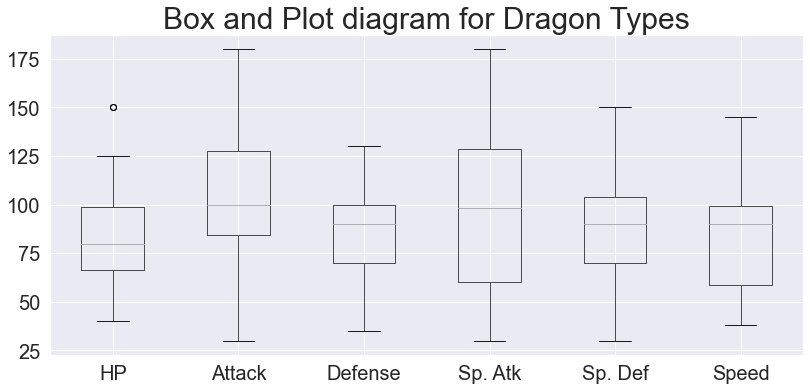

In [103]:
dragon_temp = dragon.drop(['Total',], axis = 1)
dragon_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Dragon Types', fontsize = 30)

From the boxplot, we can conclude that the top two stats for Dragon types are their Attack and Sp. Atk stats. Even though both these stats have a roughly equal median, the Attack stat for Dragon types is slightly better than that of the Sp. Atk as it has a much smaller interquartile range.

While the Dragon types are very strong attackers, one must be aware that many Dragon Pokemon also have Flying as their secondary type. This makes many Dragon types 4x weak to Ice type moves. Considering that Defense and Sp. Def is not the strongest suit of Dragon Pokemon, one must be wary. 

#### Type 16: Dark

Text(0.5, 1.0, 'Box and Plot diagram for Dark Types')

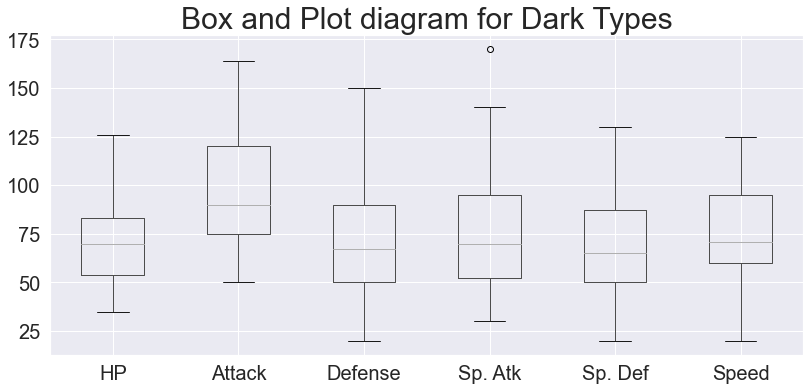

In [104]:
dark_temp = dark.drop(['Total',], axis = 1)
dark_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Dark Types', fontsize = 30)

From the boxplot, it is clear that the strongest stat for Dark Pokemon is its Attack stat. Not only is its median significantly higher than all the other stats, it also outperforms the remaining 5 stats in terms of all other metrics. 

#### Type 17: Steel

Text(0.5, 1.0, 'Box and Plot diagram for Steel Types')

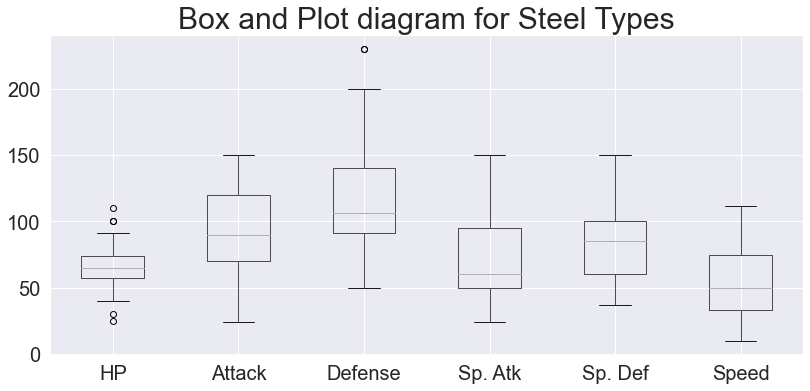

In [105]:
steel_temp = steel.drop(['Total',], axis = 1)
steel_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Steel Types', fontsize = 30)

From the boxplot, it is clear that Defense is the strongest stat amongst Steel Pokemon as its median is much higher than all the other stats. That being said, the Sp. Def stat also has a very high median value as well. This suggests that Steel Pokemon are generally very strong defenders. 

It is also worthy to note that the HP stat boxplot has numerous outliers which are located above the "maximum" and below the "minimum". This means that there are Steel Pokemon with HP stats on both ends of the spectrum - some of them have abnormally high HP while others, on the other hand, have an abnormally low HP stat. 

#### Type 18: Flying

Text(0.5, 1.0, 'Box and Plot diagram for Flying Types')

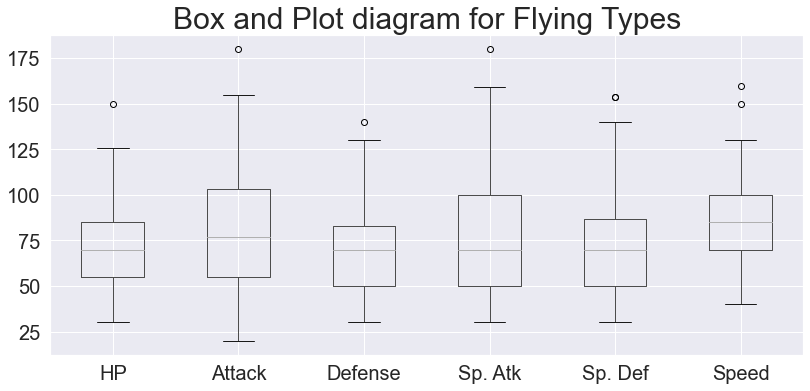

In [106]:
flying_temp = flying.drop(['Total',], axis = 1)
flying_temp.boxplot(fontsize = 20)
plt.title('Box and Plot diagram for Flying Types', fontsize = 30)

## 8.2: Comparison of stats between types 

In this section, we will be determining the top 3 Pokemon types for each stat. While the word 'top' is rather vague, we will be using two metrics - **mean** and **median** in our analysis. 

First, we will need to define two Python functions to obtain the dataframe containing the dataframes containing the mean and median of each type of Pokemon for a particular stat. 

In [48]:
def get_mean_dataframe(names, datasets, metric):
    series = pd.Series(dtype = 'float64')
    series.name = metric + ' Mean'
    for i in range(len(names)):
        series.loc[names[i]] = dataframes[i][metric].mean()
    df = series.to_frame()
    return df

def get_median_dataframe(names, datasets, metric):
    series = pd.Series(dtype = 'float64')
    series.name = metric + ' Median'
    for i in range(len(names)):
        series.loc[names[i]] = dataframes[i][metric].median()
    df = series.to_frame()
    return df


The function display_side_by_side is simply for aesthetic purposes, where we wil be comparing the mean and median dataframes for a particular stat to observe for any common observations. 

In [49]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

Next, we will obtain the relevant dataframes to conduct our analysis. In particular, we are interested at the top 3 entries of each dataframe. 

In [50]:
total_mean = get_mean_dataframe(types, dataframes, 'Total').sort_values(by = "Total Mean", ascending = False).head(3)
total_median = get_median_dataframe(types, dataframes, 'Total').sort_values(by = "Total Median", ascending = False).head(3)

hp_mean = get_mean_dataframe(types, dataframes, 'HP').sort_values(by = "HP Mean", ascending = False).head(3)
hp_median = get_median_dataframe(types, dataframes, 'HP').sort_values(by = "HP Median", ascending = False).head(3)

attack_mean = get_mean_dataframe(types, dataframes, 'Attack').sort_values(by = "Attack Mean", ascending = False).head(3)
attack_median = get_median_dataframe(types, dataframes, 'Attack').sort_values(by = "Attack Median", ascending = False).head(3)

defense_mean = get_mean_dataframe(types, dataframes, 'Defense').sort_values(by = "Defense Mean", ascending = False).head(3)
defense_median = get_median_dataframe(types, dataframes, 'Defense').sort_values(by = "Defense Median", ascending = False).head(3)

sp_atk_mean = get_mean_dataframe(types, dataframes, 'Sp. Atk').sort_values(by = "Sp. Atk Mean", ascending = False).head(3)
sp_atk_median = get_median_dataframe(types, dataframes, 'Sp. Atk').sort_values(by = "Sp. Atk Median", ascending = False).head(3)

sp_def_mean = get_mean_dataframe(types, dataframes, 'Sp. Def').sort_values(by = "Sp. Def Mean", ascending = False).head(3)
sp_def_median = get_median_dataframe(types, dataframes, 'Sp. Def').sort_values(by = "Sp. Def Median", ascending = False).head(3)

speed_mean = get_mean_dataframe(types, dataframes, 'Speed').sort_values(by = "Speed Mean", ascending = False).head(3)
speed_median = get_median_dataframe(types, dataframes, 'Speed').sort_values(by = "Speed Median", ascending = False).head(3)

In [51]:
hp = display_side_by_side(hp_mean, hp_median)

HP Mean 
 
 
 
 
 Dragon 
 82.900000 
 
 
 Ice 
 78.631579 
 
 
 Normal 
 76.735294 
 
 
 
 
 
 
 HP Median 
 
 
 
 
 Dragon 
 80.0 
 
 
 Fighting 
 75.0 
 
 
 Ground 
 75.0

In [52]:
attack = display_side_by_side(attack_mean, attack_median)

Attack Mean 
 
 
 
 
 Dragon 
 105.760000 
 
 
 Fighting 
 104.660377 
 
 
 Dark 
 96.784314 
 
 
 
 
 
 
 Attack Median 
 
 
 
 
 Fighting 
 104.0 
 
 
 Dragon 
 100.0 
 
 
 Steel 
 90.0

In [53]:
defense = display_side_by_side(defense_mean, defense_median)

Defense Mean 
 
 
 
 
 Steel 
 116.612245 
 
 
 Rock 
 107.086207 
 
 
 Ground 
 87.701493 
 
 
 
 
 
 
 Defense Median 
 
 
 
 
 Steel 
 106.0 
 
 
 Rock 
 104.0 
 
 
 Dragon 
 90.0

In [54]:
sp_atk = display_side_by_side(sp_atk_mean, sp_atk_median)

Sp. Atk Mean 
 
 
 
 
 Dragon 
 97.44 
 
 
 Psychic 
 94.60 
 
 
 Fire 
 93.00 
 
 
 
 
 
 
 Sp. Atk Median 
 
 
 
 
 Dragon 
 98.5 
 
 
 Psychic 
 95.0 
 
 
 Electric 
 92.5

In [55]:
sp_def = display_side_by_side(sp_def_mean, sp_def_median)

Sp. Def Mean 
 
 
 
 
 Dragon 
 86.900000 
 
 
 Psychic 
 86.766667 
 
 
 Steel 
 83.163265 
 
 
 
 
 
 
 Sp. Def Median 
 
 
 
 
 Dragon 
 90.0 
 
 
 Steel 
 85.0 
 
 
 Psychic 
 85.0

In [56]:
speed = display_side_by_side(speed_mean, speed_median)

Speed Mean 
 
 
 
 
 Flying 
 86.386139 
 
 
 Electric 
 82.940000 
 
 
 Dragon 
 82.140000 
 
 
 
 
 
 
 Speed Median 
 
 
 
 
 Dragon 
 90.0 
 
 
 Electric 
 86.0 
 
 
 Flying 
 85.0

In [57]:
total = display_side_by_side(total_mean, total_median)

Total Mean 
 
 
 
 
 Dragon 
 541.760000 
 
 
 Steel 
 486.591837 
 
 
 Psychic 
 477.088889 
 
 
 
 
 
 
 Total Median 
 
 
 
 
 Dragon 
 600.0 
 
 
 Fire 
 496.5 
 
 
 Steel 
 495.0

 ## 8.3: HP {-} 

Legendary Pokemon generally have higher stats as compared to Non-Legendary Pokemon. Hence from sections 8.3 to 8.9, we will be conducting a separate analysis for Legendary and Non-Legendary Pokemon when determining the top 3 Pokemon with the highest stats. 

In addition, we will be using a scatterplot to aid us in our analysis. 

In [58]:
legendary.sort_values(['HP'],ascending = False).head(3)

Pokedex #                    Name Type 1  Type 2  Total   HP  Attack  \
545       487   Giratina Origin Forme  Ghost  Dragon    680  150     120   
544       487  Giratina Altered Forme  Ghost  Dragon    680  150     100   
792       716                 Xerneas  Fairy    None    680  126     131   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
545      100      120      100     90          4      True      True  
544      120      100      120     90          4      True      True  
792       95      131       98     99          6      True      True

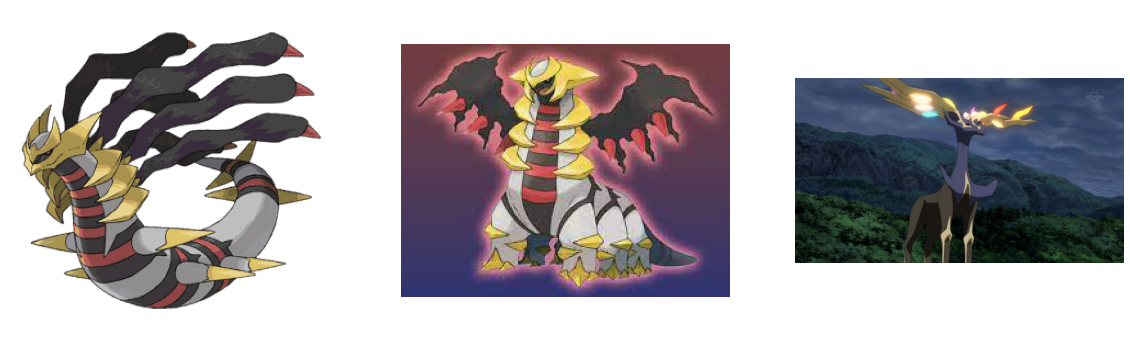

In [59]:
%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 20 , 10

# read images
giratina_origin = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\HP\Giratina Origin Forme.png")
giratina_altered = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\HP\Giratina Altered Forme.jpg")
xerneas = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\HP\Xerneas.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(giratina_origin);
ax[1].imshow(giratina_altered);
ax[2].imshow(xerneas);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest HP stat 

From left, Giratina Origin Forme, Giratina Altered Forme and Xerneas. 

In [60]:
non_legendary.sort_values(['HP'], ascending = False).head(3)

Pokedex #       Name   Type 1 Type 2  Total   HP  Attack  Defense  \
261       242    Blissey   Normal   None    540  255      10       10   
121       113    Chansey   Normal   None    450  250       5        5   
217       202  Wobbuffet  Psychic   None    405  190      33       58   

     Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
261       75      135     55          2     False      True  
121       35      105     50          1     False      True  
217       33       58     33          2     False      True

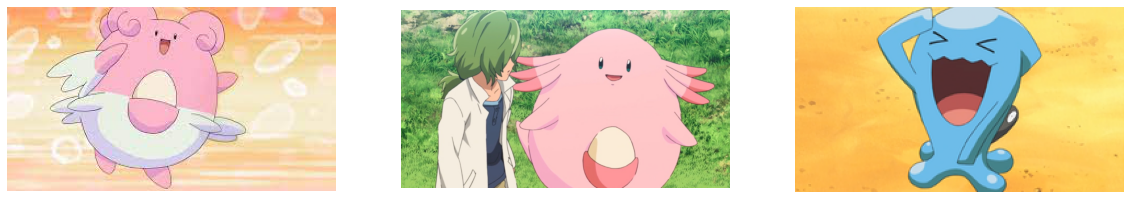

In [61]:
# read images
blissey = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\HP\Blissey.jpg")
chansey = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\HP\Chansey.jpg")
wobbuffet = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\HP\Wobbuffet.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(blissey);
ax[1].imshow(chansey);
ax[2].imshow(wobbuffet);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest HP stat 

From left, Blissey, Chansey and Wobbuffet. 

It is also interesting to note that Blissey is the evolution of Chansey. 

In [62]:
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(13.5,5.9)})

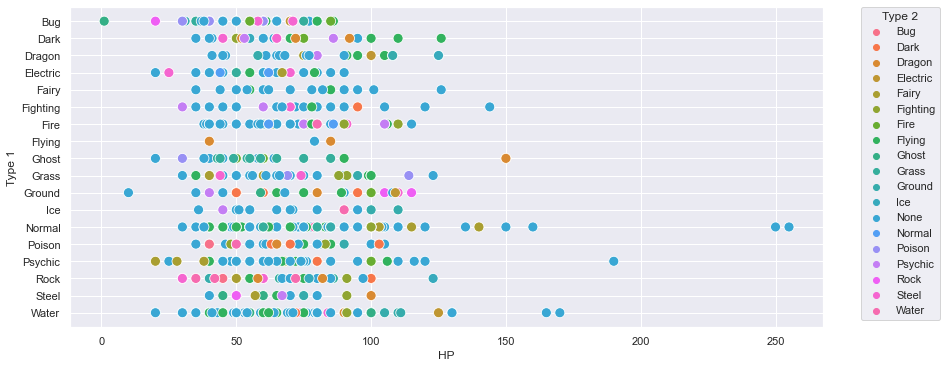

In [63]:
hp = sns.scatterplot(data = pokemon, x = "HP", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the HP Scatterplot 

1. The two Pokemon with the highest HP stats are Normal types, while the Pokemon with the 3rd highest HP stat is a Psychic type. 
2. The Pokemon with the lowest HP stats is a Bug-Ghost type. While that point may seem like an anomaly, this is not surprising as the Pokemon in question, Shedinja, can only have 1 HP. 
3. Majority of Pokemon have a HP stat in the range from 40 to 125. 

## 8.4: Attack {-} 

In [64]:
legendary.sort_values(['Attack'],ascending = False).head(3)

Pokedex #                   Name   Type 1    Type 2  Total   HP  Attack  \
163       150          Mega Mewtwo X  Psychic  Fighting    780  106     190   
429       386  Deoxys (Attack Forme)  Psychic      None    600   50     180   
426       384          Mega Rayquaza   Dragon    Flying    780  105     180   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
163      100      154      100    130          1      True      True  
429       20      180       20    150          3      True      True  
426      100      180      100    115          3      True      True

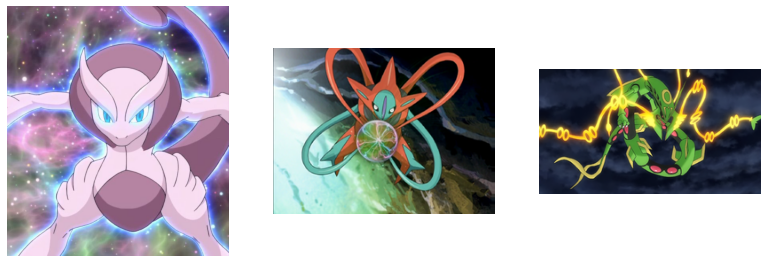

In [65]:
mega_mewtwo_x = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Attack\Mega Mewtwo X.jpg")
deoxys_attack = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Attack\Deoxys Attack.png")
mega_rayquaza = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Attack\Mega Rayquaza.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(mega_mewtwo_x);
ax[1].imshow(deoxys_attack);
ax[2].imshow(mega_rayquaza);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest Attack stat 

From left, Mega Mewtwo X, Deoxys (Attack Forme) and Mega Rayquaza. 

In [66]:
non_legendary.sort_values(['Attack'],ascending = False).head(3)

Pokedex #            Name   Type 1    Type 2  Total   HP  Attack  Defense  \
232       214  Mega Heracross      Bug  Fighting    600   80     185      115   
494       445   Mega Garchomp   Dragon    Ground    700  108     170      115   
527       475    Mega Gallade  Psychic  Fighting    618   68     165       95   

     Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
232       40      105     75          2     False      True  
494      120       95     92          4     False      True  
527       65      115    110          4     False      True

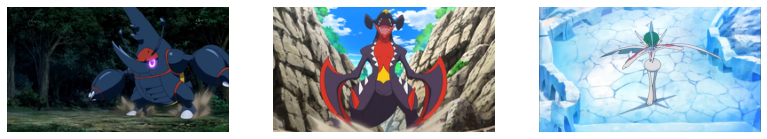

In [67]:
# read images
mega_heracross = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Attack\Mega Heracross.png")
mega_garchomp = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Attack\Mega Garchomp.png")
mega_gallade = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Attack\Mega Gallade.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(mega_heracross);
ax[1].imshow(mega_garchomp);
ax[2].imshow(mega_gallade);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Non-Legendary Pokemon with the highest Attack stat 

From left, Mega Heracross, Garchomp and Mega Gallade. 

It is interesting to note that two of the Pokemon in this top 3 list are from Generation 4 - Sinnoh. In addition, Heracross can also be found in the Generation 4 games despite not being a Generation 4 Pokemon. 

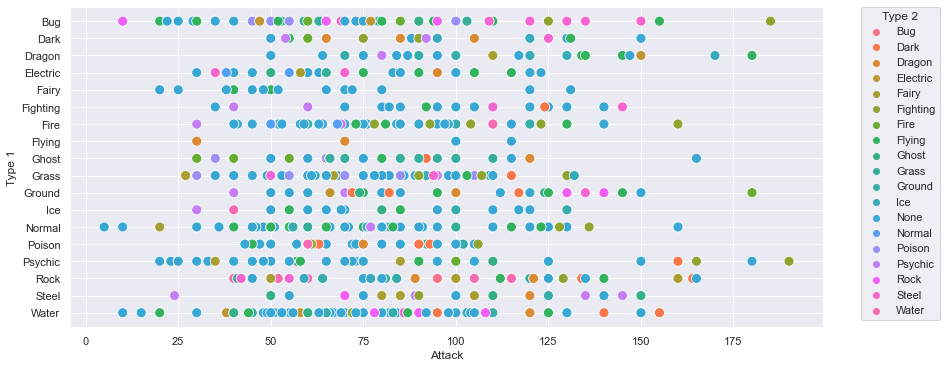

In [68]:
#Attack Scatter Plot 
attack = sns.scatterplot(data = pokemon, x = "Attack", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the Attack Scatterplot 

1. The Pokemon with the highest Attack stat is a Psychic type, followed by a Bug type.  
2. Two of the Pokemon with the lowest Attack stats are Normal types.
3. Generally, most Pokemon have a Attack stat in the range from 35 to 110. 
4. The spread of Attack stats is small for Water type Pokemon, as evidenced by the data points in the 'Water' row which are particularly compact. 

## 8.5: Defense {-} 

In [69]:
legendary.sort_values(['Defense'],ascending = False).head(3)

Pokedex #                    Name   Type 1 Type 2  Total   HP  Attack  \
414       377                Regirock     Rock   None    580   80     100   
430       386  Deoxys (Defense Forme)  Psychic   None    600   50      70   
424       383          Primal Groudon   Ground   Fire    770  100     180   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
414      200       50      100     50          3      True      True  
430      160       70      160     90          3      True      True  
424      160      150       90     90          3      True      True

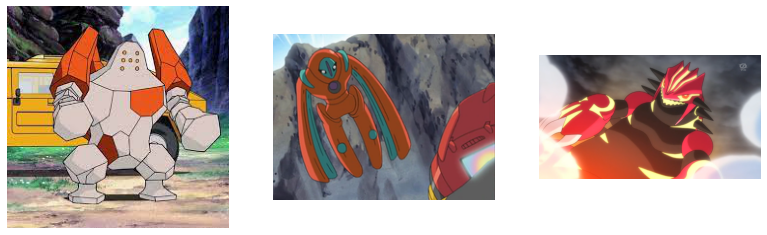

In [70]:
regirock = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Defense\Regirock.jpg")
deoxys_defense = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Defense\Deoxys Defense.png")
primal_groudon = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Defense\Primal Groudon.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(regirock);
ax[1].imshow(deoxys_defense);
ax[2].imshow(primal_groudon);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest Defense stat 

From left, Regirock, Deoxys (Defense Forme) and Primal Groudon. All 3 of these Pokemon are from Generation 3, and can all be found in Pokemon Omega Ruby/Alpha Sapphire! 

In [71]:
non_legendary.sort_values(['Defense'],ascending = False).head(3)

Pokedex #          Name Type 1  Type 2  Total  HP  Attack  Defense  \
333       306   Mega Aggron  Steel    None    630  70     140      230   
224       208  Mega Steelix  Steel  Ground    610  75     125      230   
230       213       Shuckle    Bug    Rock    505  20      10      230   

     Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
333       60       80     50          3     False      True  
224       55       95     30          2     False      True  
230       10      230      5          2     False      True

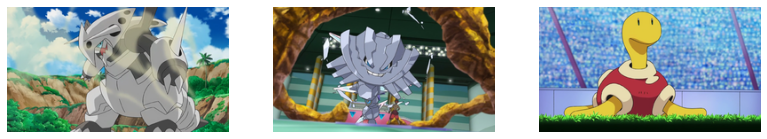

In [72]:
# read images
mega_aggron = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Defense\Mega Aggron.png")
mega_steelix = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Defense\Mega Steelix.png")
shuckle = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Defense\Shuckle.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(mega_aggron);
ax[1].imshow(mega_steelix);
ax[2].imshow(shuckle);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Non-Legendary Pokemon with the highest Defense stat 

From left, Mega Aggron, Mega Steelix and Shuckle. All 3 of these Pokemon have a Defense stat of 230! 

It is worthy to note that Shuckle also has a Special Defense stat of 230, which makes it an excellent Pokemon for a long battle! 

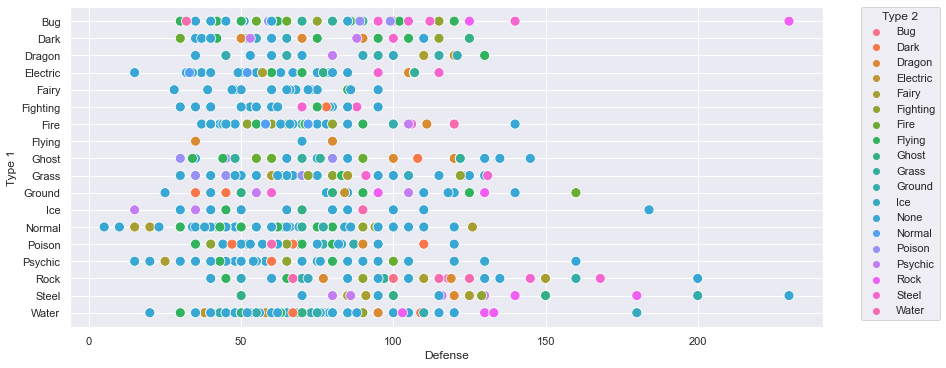

In [73]:
#Defense Scatter Plot 

defense = sns.scatterplot(data = pokemon, x = "Defense", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the Defense Scatterplot 

1. Points on the Defense scatterplot are very compact. Most Pokemon have a Defense stat between 35 and 125, with very few Pokemon falling outside this range. 
2. Overall, points on the Steel row are further to the right compared to the other types. This suggests that Steel Pokemon have generally stronger Defense stats, which is corroborated by the dataframe in section 8.2 which shows that Steel Pokemon has the highest mean and median Defense stats. 

## 8.6: Special Attack {-} 

In [74]:
legendary.sort_values(['Sp. Atk'],ascending = False).head(3)

Pokedex #                   Name   Type 1  Type 2  Total   HP  Attack  \
164       150          Mega Mewtwo Y  Psychic    None    780  106     150   
429       386  Deoxys (Attack Forme)  Psychic    None    600   50     180   
426       384          Mega Rayquaza   Dragon  Flying    780  105     180   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
164       70      194      120    140          1      True      True  
429       20      180       20    150          3      True      True  
426      100      180      100    115          3      True      True

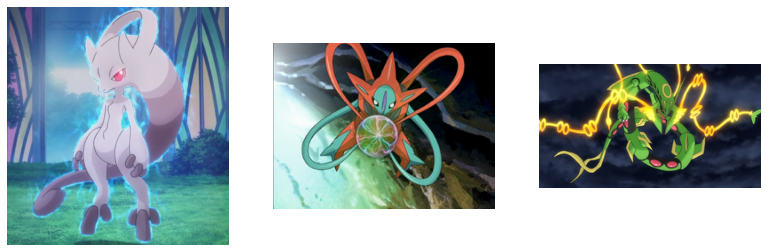

In [75]:
mega_mewtwo_y = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Sp. Atk\Mega Mewtwo Y.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(mega_mewtwo_y);
ax[1].imshow(deoxys_attack);
ax[2].imshow(mega_rayquaza);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest Sp. Atk stat 

From left, Mega Mewtwo Y, Deoxys (Attack Forme) and Mega Rayquaza.

In [76]:
non_legendary.sort_values(['Sp. Atk'],ascending = False).head(3)

Pokedex #           Name    Type 1  Type 2  Total  HP  Attack  Defense  \
71         65  Mega Alakazam   Psychic    None    590  55      50       65   
102        94    Mega Gengar     Ghost  Poison    600  60      65       80   
196       181  Mega Ampharos  Electric  Dragon    610  90      95      105   

     Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
71       175       95    150          1     False      True  
102      170       95    130          1     False      True  
196      165      110     45          2     False      True

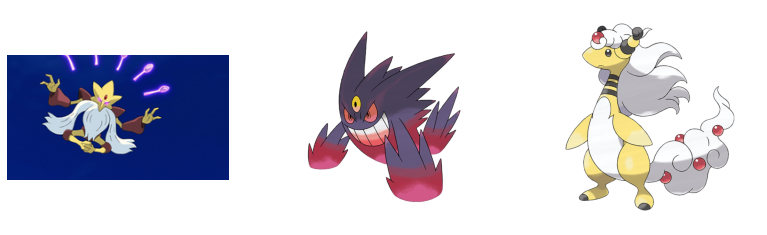

In [77]:
# read images
mega_alakazam = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Sp. Atk\Mega Alakazam.png")
mega_gengar = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Sp. Atk\Mega Gengar.png")
mega_ampharos = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Sp. Atk\Mega Ampharos.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(mega_alakazam);
ax[1].imshow(mega_gengar);
ax[2].imshow(mega_ampharos);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Non-Legendary Pokemon with the highest Sp. Atk stat 

From left, Mega Alakazam, Mega Gengar and Mega Ampharos. 

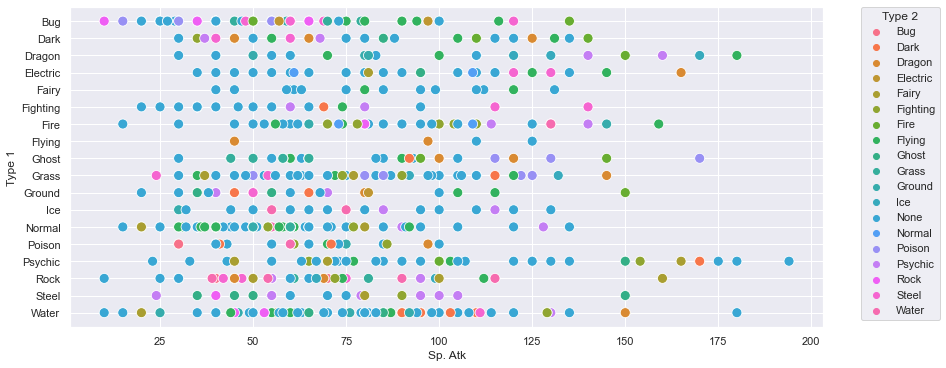

In [78]:
#Special Attack Scatterplot 

sp_atk = sns.scatterplot(data = pokemon, x = "Sp. Atk", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the Sp. Atk Scatterplot 

1. Generally, most Pokemon have a Sp. Atk stat between 45 to 115. 
2. Overall, points on the Psychic and Dragon row are further to the right compared to the other types. This suggests that Psychic and Dragon Pokemon have generally stronger Sp. Atk stats, which is corroborated by the dataframe in section 8.2 which shows that Psychic and Dragon Pokemon has the highest and 2nd highest mean and median Sp. Atk stats respectively. 

## 8.7: Special Defense {-} 

In [79]:
legendary.sort_values(['Sp. Def'],ascending = False).head(3)

Pokedex #                    Name   Type 1 Type 2  Total   HP  Attack  \
415       378                  Regice      Ice   None    580   80      50   
430       386  Deoxys (Defense Forme)  Psychic   None    600   50      70   
422       382           Primal Kyogre    Water   None    770  100     150   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
415      100      100      200     50          3      True      True  
430      160       70      160     90          3      True      True  
422       90      180      160     90          3      True      True

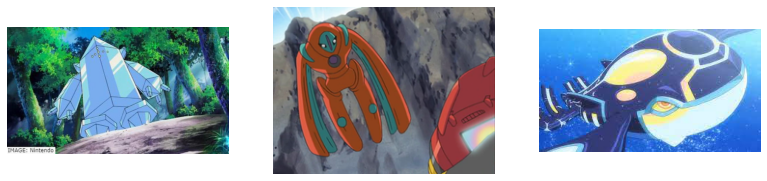

In [80]:
regice = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Sp. Def\Regice.jpeg")
primal_kyogre = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Sp. Def\Primal Kyogre.jpg")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(regice);
ax[1].imshow(deoxys_defense);
ax[2].imshow(primal_kyogre);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest Sp. Def stat 

From left, Regice, Deoxys (Defense Forme) and Primal Kyogre. These three Pokemon are all Generation 3 Pokemon, which can be found in Pokemon Omega Ruby/Alpha Sapphire! 

In [81]:
non_legendary.sort_values(['Sp. Def'],ascending = False).head(3)

Pokedex #                      Name Type 1 Type 2  Total  HP  Attack  \
230       213                   Shuckle    Bug   Rock    505  20      10   
739       671                   Florges  Fairy   None    552  78      65   
751       681  Aegislash (Shield Forme)  Steel  Ghost    520  60      50   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
230      230       10      230      5          2     False      True  
739       68      112      154     75          6     False      True  
751      150       50      150     60          6     False      True

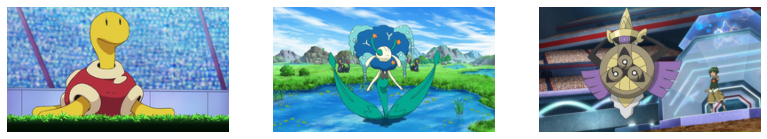

In [82]:
florges = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Sp. Def\Florges.png")
aegislash = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Sp. Def\Aegislash.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(shuckle);
ax[1].imshow(florges);
ax[2].imshow(aegislash);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Non-Legendary Pokemon with the highest Sp. Def stat 

From left, Shuckle, Florges and Aegislash (Shield Forme). It is interesting to note that both Florges and Aegislash can only be found in Generation 6 games - namely Pokemon X and Y. 

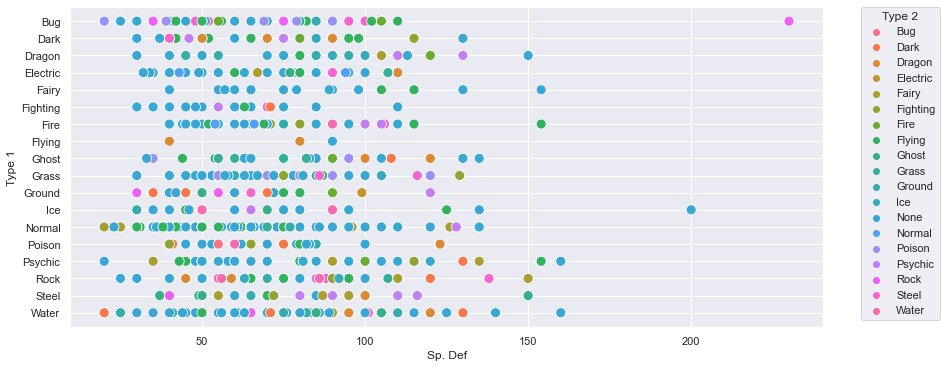

In [83]:
#Special Defense Scatter Plot 

sp_def = sns.scatterplot(data = pokemon, x = "Sp. Def", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the Special Defense Scatterplot 

1. Just like the Defense scatterplot, points on the Special Defense scatterplot are very compact. Most Pokemon have a Defense stat between 45 and 105, which is generally lower as compared to other stats. 
2. It is interesting to note that unlike the Attack and Sp. Atk stats, where the highest stat is below 200, there are 2 Pokemon (Regice and Shuckle) with a Sp. Def stat of 200 or more.

## 8.8: Speed {-}   

In [84]:
legendary.sort_values(['Speed'],ascending = False).head(3)

Pokedex #                   Name   Type 1 Type 2  Total  HP  Attack  \
431       386   Deoxys (Speed Forme)  Psychic   None    600  50      95   
429       386  Deoxys (Attack Forme)  Psychic   None    600  50     180   
428       386  Deoxys (Normal Forme)  Psychic   None    600  50     150   

     Defense  Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
431       90       95       90    180          3      True      True  
429       20      180       20    150          3      True      True  
428       50      150       50    150          3      True      True

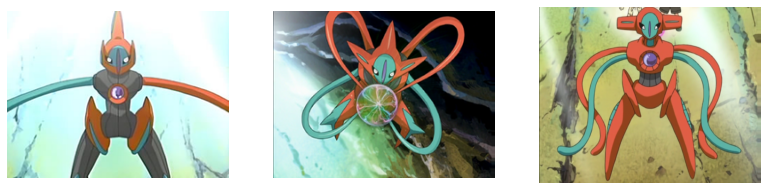

In [85]:
deoxys_speed = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Speed\Deoxys Speed.png")
deoxys = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Legendary\Speed\Deoxys Normal.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(deoxys_speed);
ax[1].imshow(deoxys_attack);
ax[2].imshow(deoxys);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Legendary Pokemon with the highest Speed stat 

From left, Deoxys (Speed Forme), Deoxys (Attack Forme) and Deoxys (Normal Forme). It is interesting to note that the 3 Pokemon with the top Speed stats are simply just different formes of Deoxys! 

In [86]:
non_legendary.sort_values(['Speed'],ascending = False).head(3)

Pokedex #             Name   Type 1  Type 2  Total  HP  Attack  Defense  \
315       291          Ninjask      Bug  Flying    456  61      90       45   
154       142  Mega Aerodactyl     Rock  Flying    615  80     135       85   
71         65    Mega Alakazam  Psychic    None    590  55      50       65   

     Sp. Atk  Sp. Def  Speed Generation Legendary Dual Type  
315       50       50    160          3     False      True  
154       70       95    150          1     False      True  
71       175       95    150          1     False      True

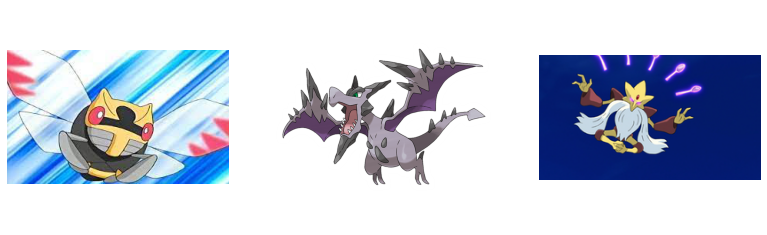

In [87]:
ninjask = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Speed\Ninjask.jpg")
mega_aerodactyl = mpimg.imread(r"C:\Users\User\Desktop\Data Science Projects\Pokemon\Non-Legendary\Speed\Mega Aerodactyl.png")

# display images
fig, ax = plt.subplots(1,3)

ax[0].imshow(ninjask);
ax[1].imshow(mega_aerodactyl);
ax[2].imshow(mega_alakazam);

for i in range(3):
    ax[i].axis('off')

#### Top 3 Non-Legendary Pokemon with the highest Speed stat 

From left, Ninjask, Mega Aerodactyl and Mega Alakazam.

It is also interesting to note that apart from having the highest Speed stat of 160, Ninjask also has the Ability Speed Boost, which raises its Speed at the end of every turn! 

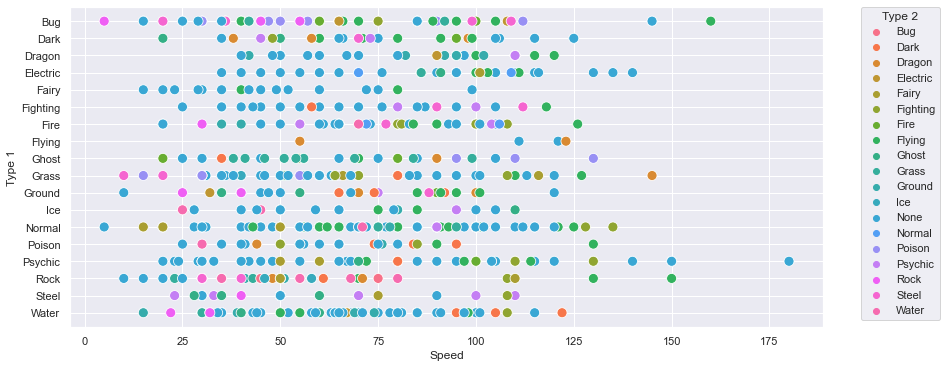

In [88]:
#Speed Scatterplot 

speed = sns.scatterplot(data = pokemon, x = "Speed", y = "Type 1", hue = "Type 2", s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Type 2')

Results from the Special Defense Scatterplot 

1. Most Pokemon have a Speed stat between 30 and 115. 
2. Points on the Fairy and Rock row are generally further to the left as compared to other types. This suggests that Rock and Fairy Pokemon have a generally lower Speed stat compared to other Pokemon types. 

# Part 9: Conclusion {-}

As outlined above, this Pokemon dataset can be analysed from several perspectives. In an increasingly data-driven world, perhaps we can use data to make better decisions as Pokemon players, regardless of whether we are playing recreationally or competitively. 